# Tutorial 11

## Outline

+ Decision Tree methods
+ UGrad Project: RMSE vs MAE

## Decision Tree

+ [Documentation](https://scikit-learn.org/stable/modules/tree.html#decision-trees)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris

In [2]:
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names
print("Feature names:", feature_names)
print("Target names:", target_names)

Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target names: ['setosa' 'versicolor' 'virginica']


In [3]:
# define
clf = DecisionTreeClassifier()
# fit
clf.fit(X,y)

# predict
y_pred = clf.predict(X)

# accuracy
accuracy_score(y, y_pred)

1.0

### Plot the decision process

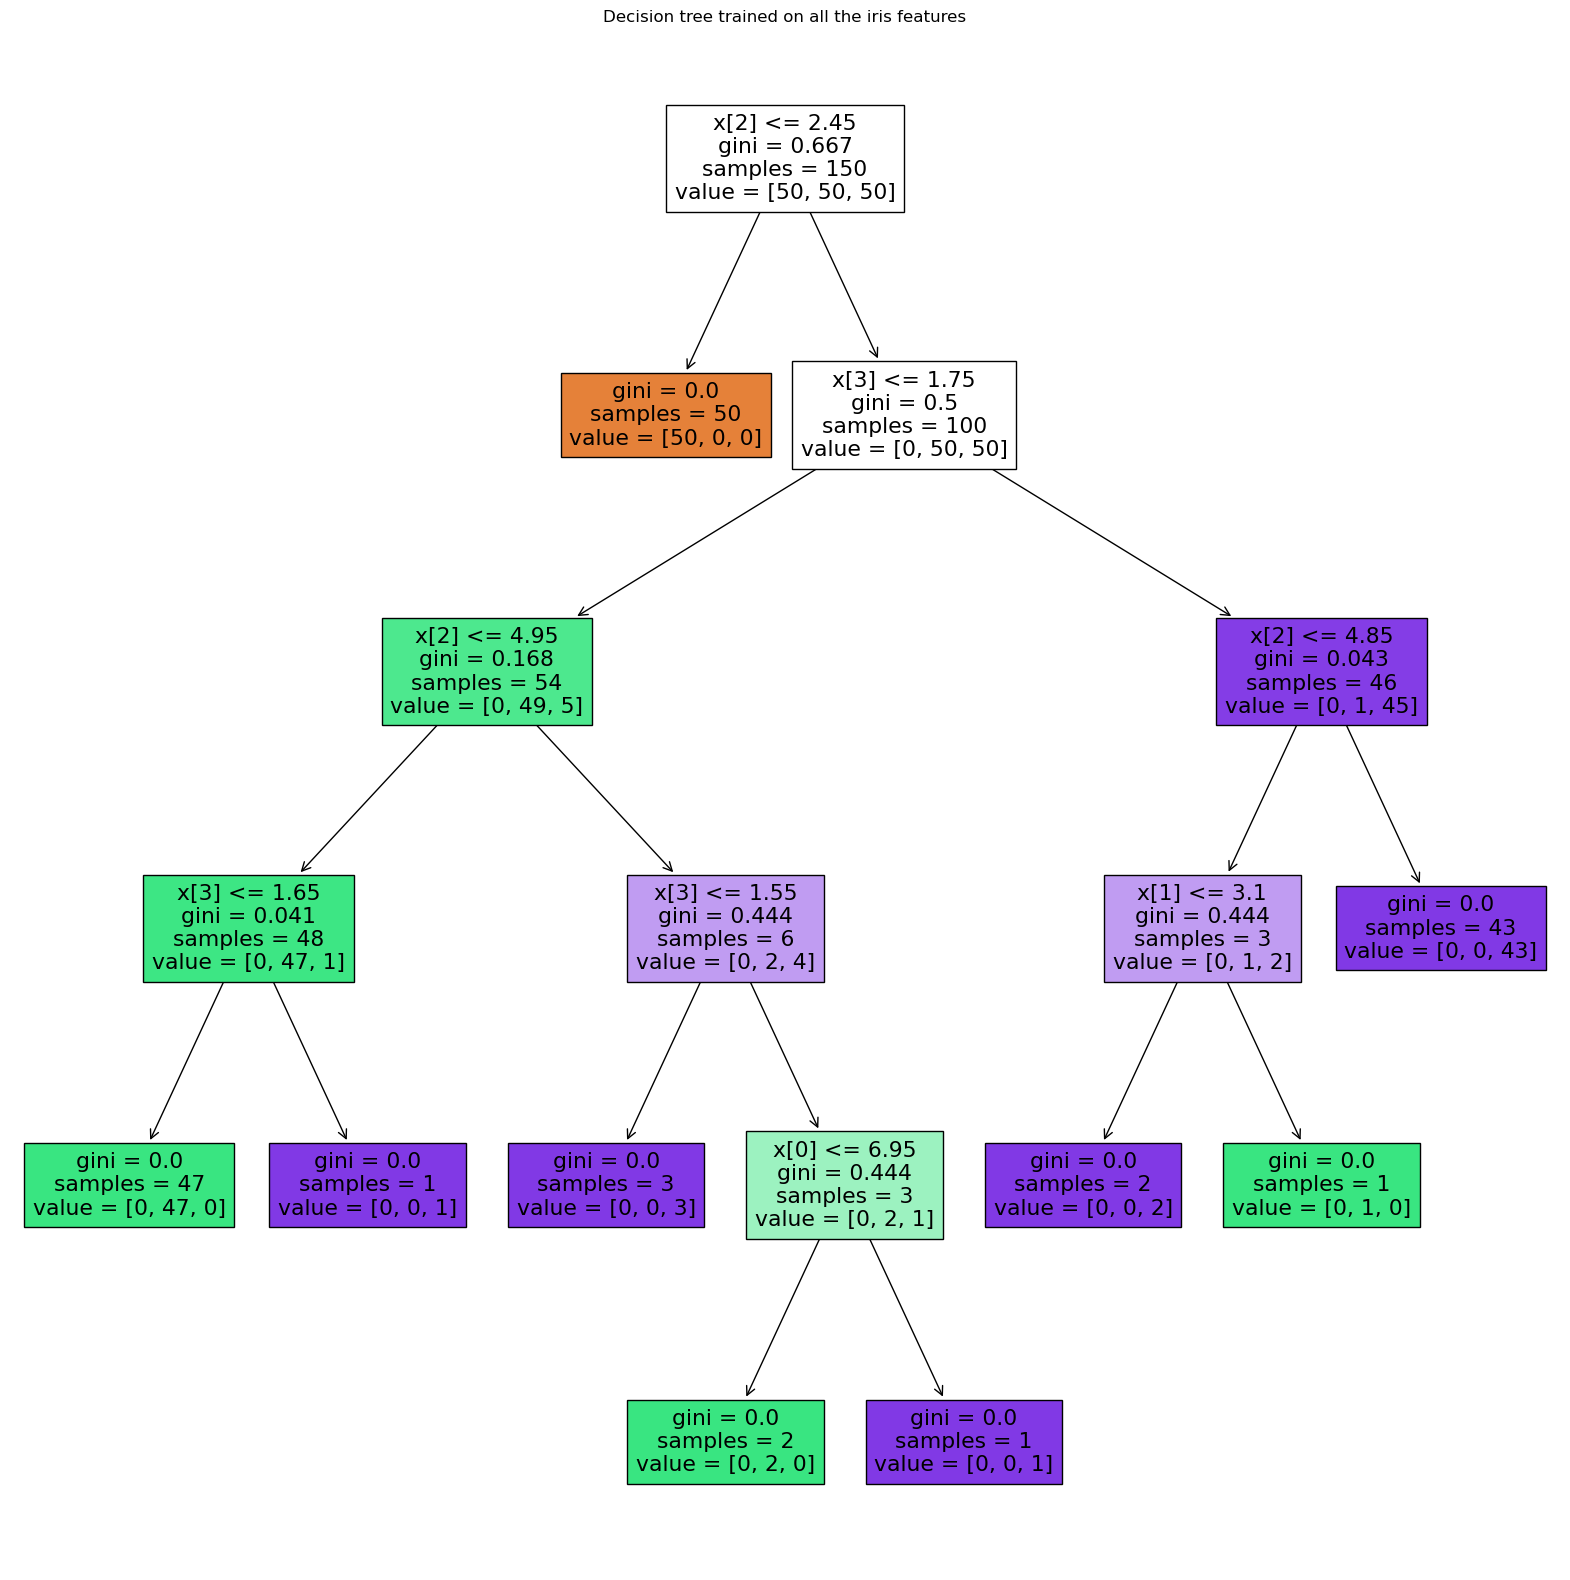

In [4]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 20))
plot_tree(clf, filled=True)
plt.title("Decision tree trained on all the iris features")
plt.show()

## Random Forest

+ [Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier)

A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.


Let's play with a more challenging dataset.

In [5]:
from sklearn.ensemble import RandomForestClassifier

In [7]:
def load_wines(path):
    df = pd.read_csv(path)
    X = df.iloc[:, :-2].values
    y = df.iloc[:, -1].values
    return X, y

X, y = load_wines("./wines.csv")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [9]:
dt = DecisionTreeClassifier().fit(X_train,y_train)

print("Decision Tree Accuracy (train):", accuracy_score(y_train, dt.predict(X_train)))
print("Decision Tree Accuracy (test):", accuracy_score(y_test, dt.predict(X_test)))

Decision Tree Accuracy (train): 1.0
Decision Tree Accuracy (test): 0.8611111111111112


In [10]:
rf = RandomForestClassifier().fit(X_train,y_train)

print("Random Forest Accuracy (train):", accuracy_score(y_train, rf.predict(X_train)))
print("Random Forest Accuracy (test):", accuracy_score(y_test, rf.predict(X_test)))

Random Forest Accuracy (train): 1.0
Random Forest Accuracy (test): 0.9722222222222222


### Play around with hyperparameters?

In [11]:
help(DecisionTreeClassifier)

Help on class DecisionTreeClassifier in module sklearn.tree._classes:

class DecisionTreeClassifier(sklearn.base.ClassifierMixin, BaseDecisionTree)
 |  DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)
 |  
 |  A decision tree classifier.
 |  
 |  Read more in the :ref:`User Guide <tree>`.
 |  
 |  Parameters
 |  ----------
 |  criterion : {"gini", "entropy", "log_loss"}, default="gini"
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "log_loss" and "entropy" both for the
 |      Shannon information gain, see :ref:`tree_mathematical_formulation`.
 |  
 |  splitter : {"best", "random"}, default="best"
 |      The strategy used to choose the split at each node. Supported
 |      strategies are "best" to 

## RMSE vs MAE


$$ \mathrm{RMSE} = \sqrt{\frac{1}{N}\sum_i (\hat{y}_i-y_i)^2} $$

In [15]:
def rmse(y_pred, y_true):
    return np.sqrt(np.mean((y_pred-y_true)**2
                         ))

$$ \mathrm{MAE} = \frac{1}{N}\sum_i |\hat{y}_i-y_i|$$

In [13]:
def mae(y_pred, y_true):
    return np.mean(np.abs(y_pred-y_true))

Compared to MAE, RMSE is usually numerically larger and more sensitive to outliers.

In [16]:
y_true = np.random.random(1000) * 20 - 10
y_pred = y_true + np.random.randn(1000) * 2

rmse(y_true, y_pred)

1.9725792698304667

In [17]:
mae(y_true, y_pred)

1.5629131922017891

### In the UGrad ANI project, you should aim for an RMSE < 5 kcal/mol, or MAE < 2 kcal/mol on the test set.


### Be aware of the energy unit conversions!


$$ \mathrm{1\ Hartree = 627.5094738898777\ kcal/mol} $$